Step 1: Import Libraries and download datasets


In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.6 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud
from collections import Counter

import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model

from pprint import pprint
# Download NLTK stop words
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
!pip install -q transformers==4.37.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 27.2 MB/s eta 0:00:00


In [ ]:
!pip install pydot

In [ ]:
from transformers import BertTokenizer, TFBertModel

In [ ]:
dataset = load_dataset("orieg/elsevier-oa-cc-by")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:1461: FutureWarning: The repository for orieg/elsevier-oa-cc-by contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/orieg/elsevier-oa-cc-by
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datas

Generating train split:   0%|          | 0/32072 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/4008 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/4009 [00:00<?, ? examples/s]

In [ ]:
elsevier_dataset = dataset

In [ ]:
print(elsevier_dataset)

DatasetDict({
    train: Dataset({
        features: ['title', 'abstract', 'subjareas', 'keywords', 'asjc', 'body_text', 'author_highlights'],
        num_rows: 32072
    })
    test: Dataset({
        features: ['title', 'abstract', 'subjareas', 'keywords', 'asjc', 'body_text', 'author_highlights'],
        num_rows: 4008
    })
    validation: Dataset({
        features: ['title', 'abstract', 'subjareas', 'keywords', 'asjc', 'body_text', 'author_highlights'],
        num_rows: 4009
    })
})


In [ ]:
train_set = elsevier_dataset['train']
train_df = pd.DataFrame(train_set)
print("Shape of the training set:", train_df.shape)


Shape of the training set: (32072, 7)


In [ ]:
val_set = elsevier_dataset['validation']
val_df = pd.DataFrame(val_set)

test_set = elsevier_dataset['test']
test_df = pd.DataFrame(test_set)

In [ ]:
print(val_df.shape)
print(test_df.shape)

(4009, 7)
(4008, 7)


In [ ]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32072 entries, 0 to 32071
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              32072 non-null  object
 1   abstract           32072 non-null  object
 2   subjareas          32072 non-null  object
 3   keywords           32072 non-null  object
 4   asjc               32072 non-null  object
 5   body_text          32072 non-null  object
 6   author_highlights  32072 non-null  object
dtypes: object(7)
memory usage: 1.7+ MB
None


In [ ]:
train_df.head()

,title,abstract,subjareas,keywords,asjc,body_text,author_highlights
0,Performance bonuses in the public sector: Winn...,We conduct a randomized trial to compare incen...,"[ECON, SOCI]","[Child development, Contest design, Malnutriti...","[2002, 3303]",[Prize contests and other performance incentiv...,"[Bonuses can be paid in proportion to success,..."
1,Energy and water use of a small-scale raft aqu...,Aquaponics is a form of aquaculture that integ...,[AGRI],"[Aquaculture, Aquaponic raft culture, Aquaponi...",[1104],[Aquaponics is a form of aquaculture that inte...,[Inputs and outputs of a small-scale raft aqua...
2,Beyond a bigger brain: Multivariable structura...,People with larger brains tend to score higher...,"[ARTS, PSYC]","[Brain, G-factor, Intelligence, MRI, Structura...","[1201, 3204, 3205]",[Half or more of the variance in human intelli...,[Brain size is known to correlate with general...
3,Experimental data on compressive strength and ...,In this data article experimental data on the ...,[MULT],"[Acid resistance, Bitumen, Compressive strengt...",[1000],[The data include information on the propertie...,[]
4,Visual short-term memory binding deficit in fa...,Long-term episodic memory deficits in Alzheime...,"[NEUR, PSYC]","[Hippocampus, Medial temporal lobe, Relational...","[2805, 3205, 3206]","[Memory impairment is a central, defining feat...",[]


Step 2: Since there is severe class Imbalance, we handle the class imbalance by incorporating the following mapping

VETE, HEAL, DENT, NURS -> MEDI
ECON, ARTS, BUSI,DECI -> SOCI
MATH -> MULT


In [ ]:
def adjust_subjareas(subjareas_list):
    if any(area in subjareas_list for area in ['VETE', 'HEAL', 'DENT', 'NURS']):
        return ['MEDI']
    elif any(area in subjareas_list for area in ['ECON', 'ARTS', 'BUSI', 'DECI']):
        return ['SOCI']
    elif 'MATH' in subjareas_list:
        return ['MULT']
    else:
        return subjareas_list

train_df['subjareas'] = train_df['subjareas'].apply(adjust_subjareas)
val_df['subjareas'] = val_df['subjareas'].apply(adjust_subjareas)
test_df['subjareas'] = test_df['subjareas'].apply(adjust_subjareas)

Step 2: Data Pre-processing

In [ ]:
def prepare_elsevier_data(train_df, val_df, test_df):
    """
    Prepares the Elsevier corpus splits for multi-label classification without splitting.

    Args:
    - train_df: DataFrame containing the training dataset with columns 'abstract' and 'subjareas'.
    - val_df: DataFrame containing the validation dataset with columns 'abstract' and 'subjareas'.
    - test_df: DataFrame containing the test dataset with columns 'abstract' and 'subjareas'.

    Returns:
    - train_texts, val_texts, test_texts: Lists containing texts for training, validation, and testing.
    - train_labels, val_labels, test_labels: Arrays containing encoded labels for training, validation, and testing.
    - target_names: List of unique labels (subject areas).
    """
    mlb = MultiLabelBinarizer()

    all_labels = pd.concat([train_df['subjareas'], val_df['subjareas'], test_df['subjareas']])
    mlb.fit(all_labels)

    train_labels = mlb.transform(train_df['subjareas'])
    val_labels = mlb.transform(val_df['subjareas'])
    test_labels = mlb.transform(test_df['subjareas'])

    train_texts = train_df['abstract'].tolist()
    val_texts = val_df['abstract'].tolist()
    test_texts = test_df['abstract'].tolist()

    return train_texts, val_texts, test_texts, train_labels, val_labels, test_labels, mlb.classes_

train_texts, val_texts, test_texts, train_labels, val_labels, test_labels, target_names = prepare_elsevier_data(train_df, val_df, test_df)

In [ ]:
print(train_labels[:2])
print(train_texts[:2])
print(len(target_names))

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
['We conduct a randomized trial to compare incentives for improved child outcomes among salaried caregivers in Chandigarh, India. A contest whose prize is divided among workers in proportion to measured gains yielded more improvement than a winner-take-all program. In our population of about 2000 children served by 85 workers, using proportional rewards led to weight-for-age malnutrition rates that were 4.3 percentage points lower at 3 months (when rewards were paid) and 5.9 points lower at 6 months (after the contest had ended), with mean weight-for-age z scores that were 0.071 higher at 3 months, and 0.095 higher at 6 months. Proportional bonuses led to larger and more sustained gains because of better performance by lower-ranked workers, whose efforts were not rewarded by a winner-take-all prize. Results are consistent with previous laboratory trials and athletic events, demonstrating the value of proport

In [ ]:
print(len(train_texts))
print(len(val_texts))

32072
4009


In [ ]:
#convert labels into numpy array

npvalid_labels = np.asarray(val_labels)
nptrain_labels = np.asarray(train_labels)
nptest_labels = np.asarray(test_labels)

step 3: Classification with fine tuned BERT Model

In [ ]:
model_checkpoint = 'bert-base-cased'

In [ ]:
bert_tokenizer = BertTokenizer.from_pretrained(model_checkpoint)
bert_model = TFBertModel.from_pretrained(model_checkpoint)


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

step 3: Set maximum dimension length based on the data

In [ ]:
max_length = 300

Step 4: Apply tokenization process to  Elsevier corpus. Tokenization converts your text data into a format that the BERT model can understand and process. It involves splitting the text into tokens (words or subwords), truncating sequences to the maximum length (max_length), and padding shorter sequences with zeros.

In [ ]:
train_encodings = bert_tokenizer(train_texts, truncation=True, padding=True, max_length=max_length, return_tensors='tf')
valid_encodings = bert_tokenizer(val_texts, truncation=True, padding=True, max_length=max_length, return_tensors='tf')
test_encodings = bert_tokenizer(test_texts, truncation=True, padding=True, max_length=max_length, return_tensors='tf')

The call method implements the Label Attention Mechanism (LAM) which enhances BERT embeddings for multi-label classification. It first normalizes the word and label embeddings to calculate their cosine similarity, indicating compatibility. Next, it determines the most relevant words for each label using max pooling, and then applies softmax to these values to obtain attention scores. Finally, it computes a weighted sum of the BERT word embeddings based on these attention scores, summing over the sequence to produce a focused representation for each label.

In [ ]:

class LabelAttentionLayer(Layer):
    def __init__(self, num_labels, embedding_dim, **kwargs):
        super(LabelAttentionLayer, self).__init__(**kwargs)
        self.num_labels = num_labels
        self.embedding_dim = embedding_dim

    def build(self, input_shape):
        # Initialize label embeddings
        self.label_embeddings = self.add_weight(shape=(self.num_labels, self.embedding_dim),
                                                initializer="glorot_uniform",
                                                name="label_embeddings")

    def call(self, inputs):
        # Cosine similarity between word embeddings and label embeddings
        word_embeddings_norm = tf.nn.l2_normalize(inputs, axis=-1)
        label_embeddings_norm = tf.nn.l2_normalize(self.label_embeddings, axis=-1)
        cosine_similarity = tf.matmul(word_embeddings_norm, label_embeddings_norm, transpose_b=True)

        # Max pooling and softmax for attention scores
        max_similarity = tf.reduce_max(cosine_similarity, axis=2)
        attention_scores = tf.keras.layers.Softmax(axis=-1)(max_similarity)

        # Apply attention scores to word embeddings
        attention_scores_expanded = tf.expand_dims(attention_scores, axis=-1)
        weighted_sum = tf.reduce_sum(inputs * attention_scores_expanded, axis=1)
        return weighted_sum


Step 4: Create a multiclass BERT model

multi-label binarization to convert the subject area labels into a binary format, where each label is represented by a 0 (absence) or 1 (presence).

BERT Model Configuration: A pre-trained BERT model (bert-base-cased) was chosen as the base for feature extraction. On top of it, a custom model was built for classification.

Custom Model: Added dense layers on top of BERT's pooled output, including a final dense layer with a sigmoid activation function to handle multi-label classification.

Loss Function: Used BinaryCrossentropy to treat each output label as an independent binary classification problem.
Optimizer: An Adam optimizer with a learning rate of 0.00005 was configured.

In [ ]:

def create_bert_lam_multilabel_model(num_labels, max_length, hidden_size=512, dropout=0.3):
    bert_model = TFBertModel.from_pretrained('bert-base-cased')
    bert_model.trainable = True

    input_ids = Input(shape=(max_length,), dtype=tf.int32, name='input_ids')
    token_type_ids = Input(shape=(max_length,), dtype=tf.int32, name='token_type_ids')
    attention_mask = Input(shape=(max_length,), dtype=tf.int32, name='attention_mask')

    bert_output = bert_model(input_ids=input_ids, token_type_ids=token_type_ids, attention_mask=attention_mask)
    last_hidden_state = bert_output.last_hidden_state

    # Apply LabelAttentionLayer on last hidden state
    label_attention_output = LabelAttentionLayer(num_labels=num_labels,embedding_dim=768)(last_hidden_state)

    # Proceed with dense layers or other operations as needed
    hidden = Dense(hidden_size, activation='relu')(label_attention_output)
    hidden = Dropout(dropout)(hidden)

    # Classifier applied on the aggregated output
    output = Dense(num_labels, activation='sigmoid')(hidden)

    model = Model(inputs=[input_ids, token_type_ids, attention_mask], outputs=output)

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model


In [ ]:
num_subject_areas = len(target_names)
num_subject_areas

18

In [ ]:
pooler_bert_model = create_bert_lam_multilabel_model(num_labels=num_subject_areas, max_length=max_length, hidden_size=512, dropout=0.3)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
pooler_bert_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 300)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 300)]                0         []                            
 )                                                                                                
                                                                                                  
 token_type_ids (InputLayer  [(None, 300)]                0         []                            
 )                                                                                                
                                                                                              

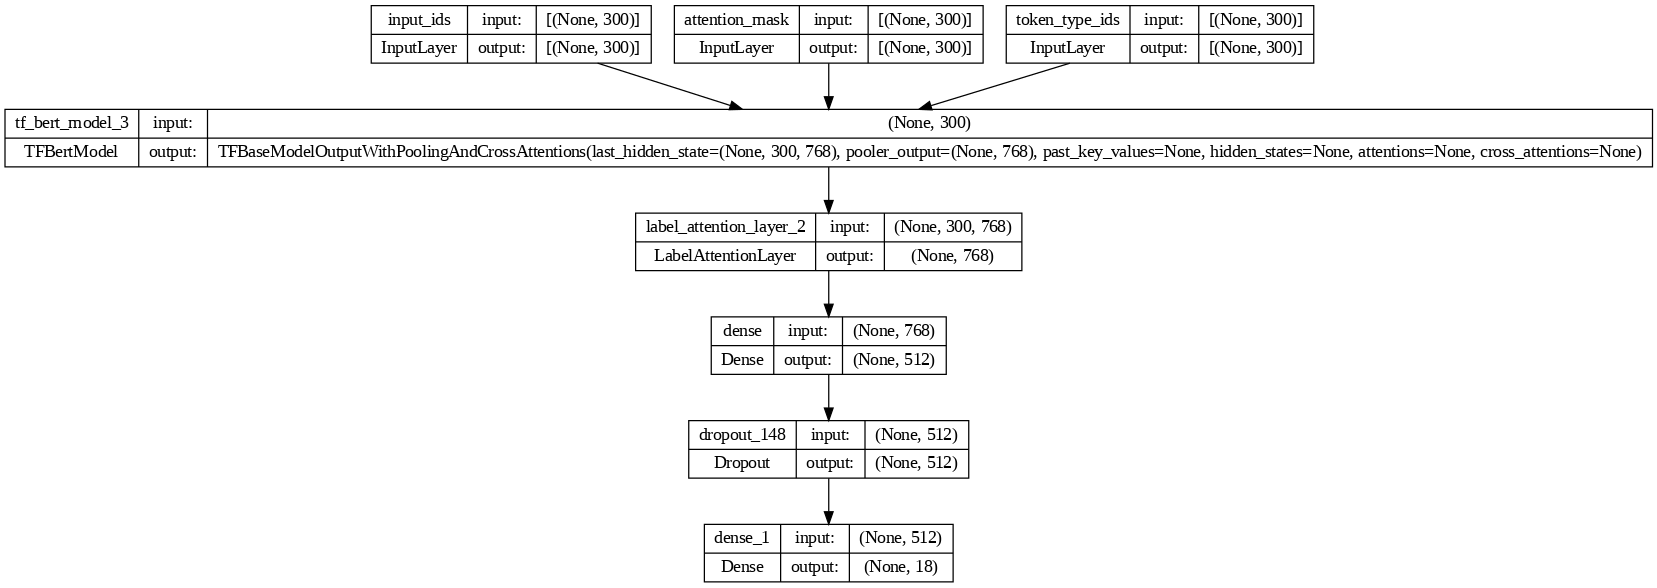

In [ ]:
keras.utils.plot_model(pooler_bert_model, show_shapes=True, show_dtype=False, show_layer_names=True, dpi=90)

In [ ]:
#It takes 10 to 14 minutes to complete an epoch when using a GPU
pooler_bert_model_history = pooler_bert_model.fit([train_encodings.input_ids, train_encodings.token_type_ids, train_encodings.attention_mask],
          train_labels,
          validation_data=([valid_encodings.input_ids, valid_encodings.token_type_ids, valid_encodings.attention_mask],
                           val_labels),
          batch_size=8,
          epochs=2)

Epoch 1/2


4009/4009 [==============================] - 2339s 572ms/step - loss: 0.1807 - accuracy: 0.4878 - val_loss: 0.1534 - val_accuracy: 0.5358
Epoch 2/2
3573/4009 [=========================>....] - ETA: 4:00 - loss: 0.1420 - accuracy: 0.5637

Validation Data Set Evaluation

In [ ]:
val_score = pooler_bert_model.evaluate([valid_encodings.input_ids, valid_encodings.token_type_ids, valid_encodings.attention_mask],
                                                  val_labels)

print('Val loss:', val_score[0])
print('Val accuracy:', val_score[1])

107/107 [==============================] - 71s 660ms/step - loss: 0.1467 - accuracy: 0.5634
Val loss: 0.14667457342147827
Val accuracy: 0.5633967518806458


In [ ]:
val_predictions = pooler_bert_model.predict([valid_encodings.input_ids, valid_encodings.token_type_ids, valid_encodings.attention_mask])

107/107 [==============================] - 73s 656ms/step


107/107 [==============================] - 71s 666ms/step
              precision    recall  f1-score   support

        AGRI       0.77      0.74      0.75       452
        BIOC       0.66      0.72      0.69       653
        CENG       0.50      0.41      0.45       167
        CHEM       0.58      0.51      0.54       248
        COMP       0.77      0.40      0.53       179
        EART       0.93      0.57      0.71       243
        ENER       0.78      0.64      0.71       237
        ENGI       0.65      0.58      0.61       412
        ENVI       0.69      0.71      0.70       523
        IMMU       0.74      0.49      0.59       226
        MATE       0.77      0.70      0.73       355
        MEDI       0.83      0.62      0.71       588
        MULT       0.85      0.75      0.80       352
        NEUR       0.88      0.77      0.82       341
        PHAR       0.77      0.30      0.44       240
        PHYS       0.82      0.33      0.47       245
        PSYC       0.92

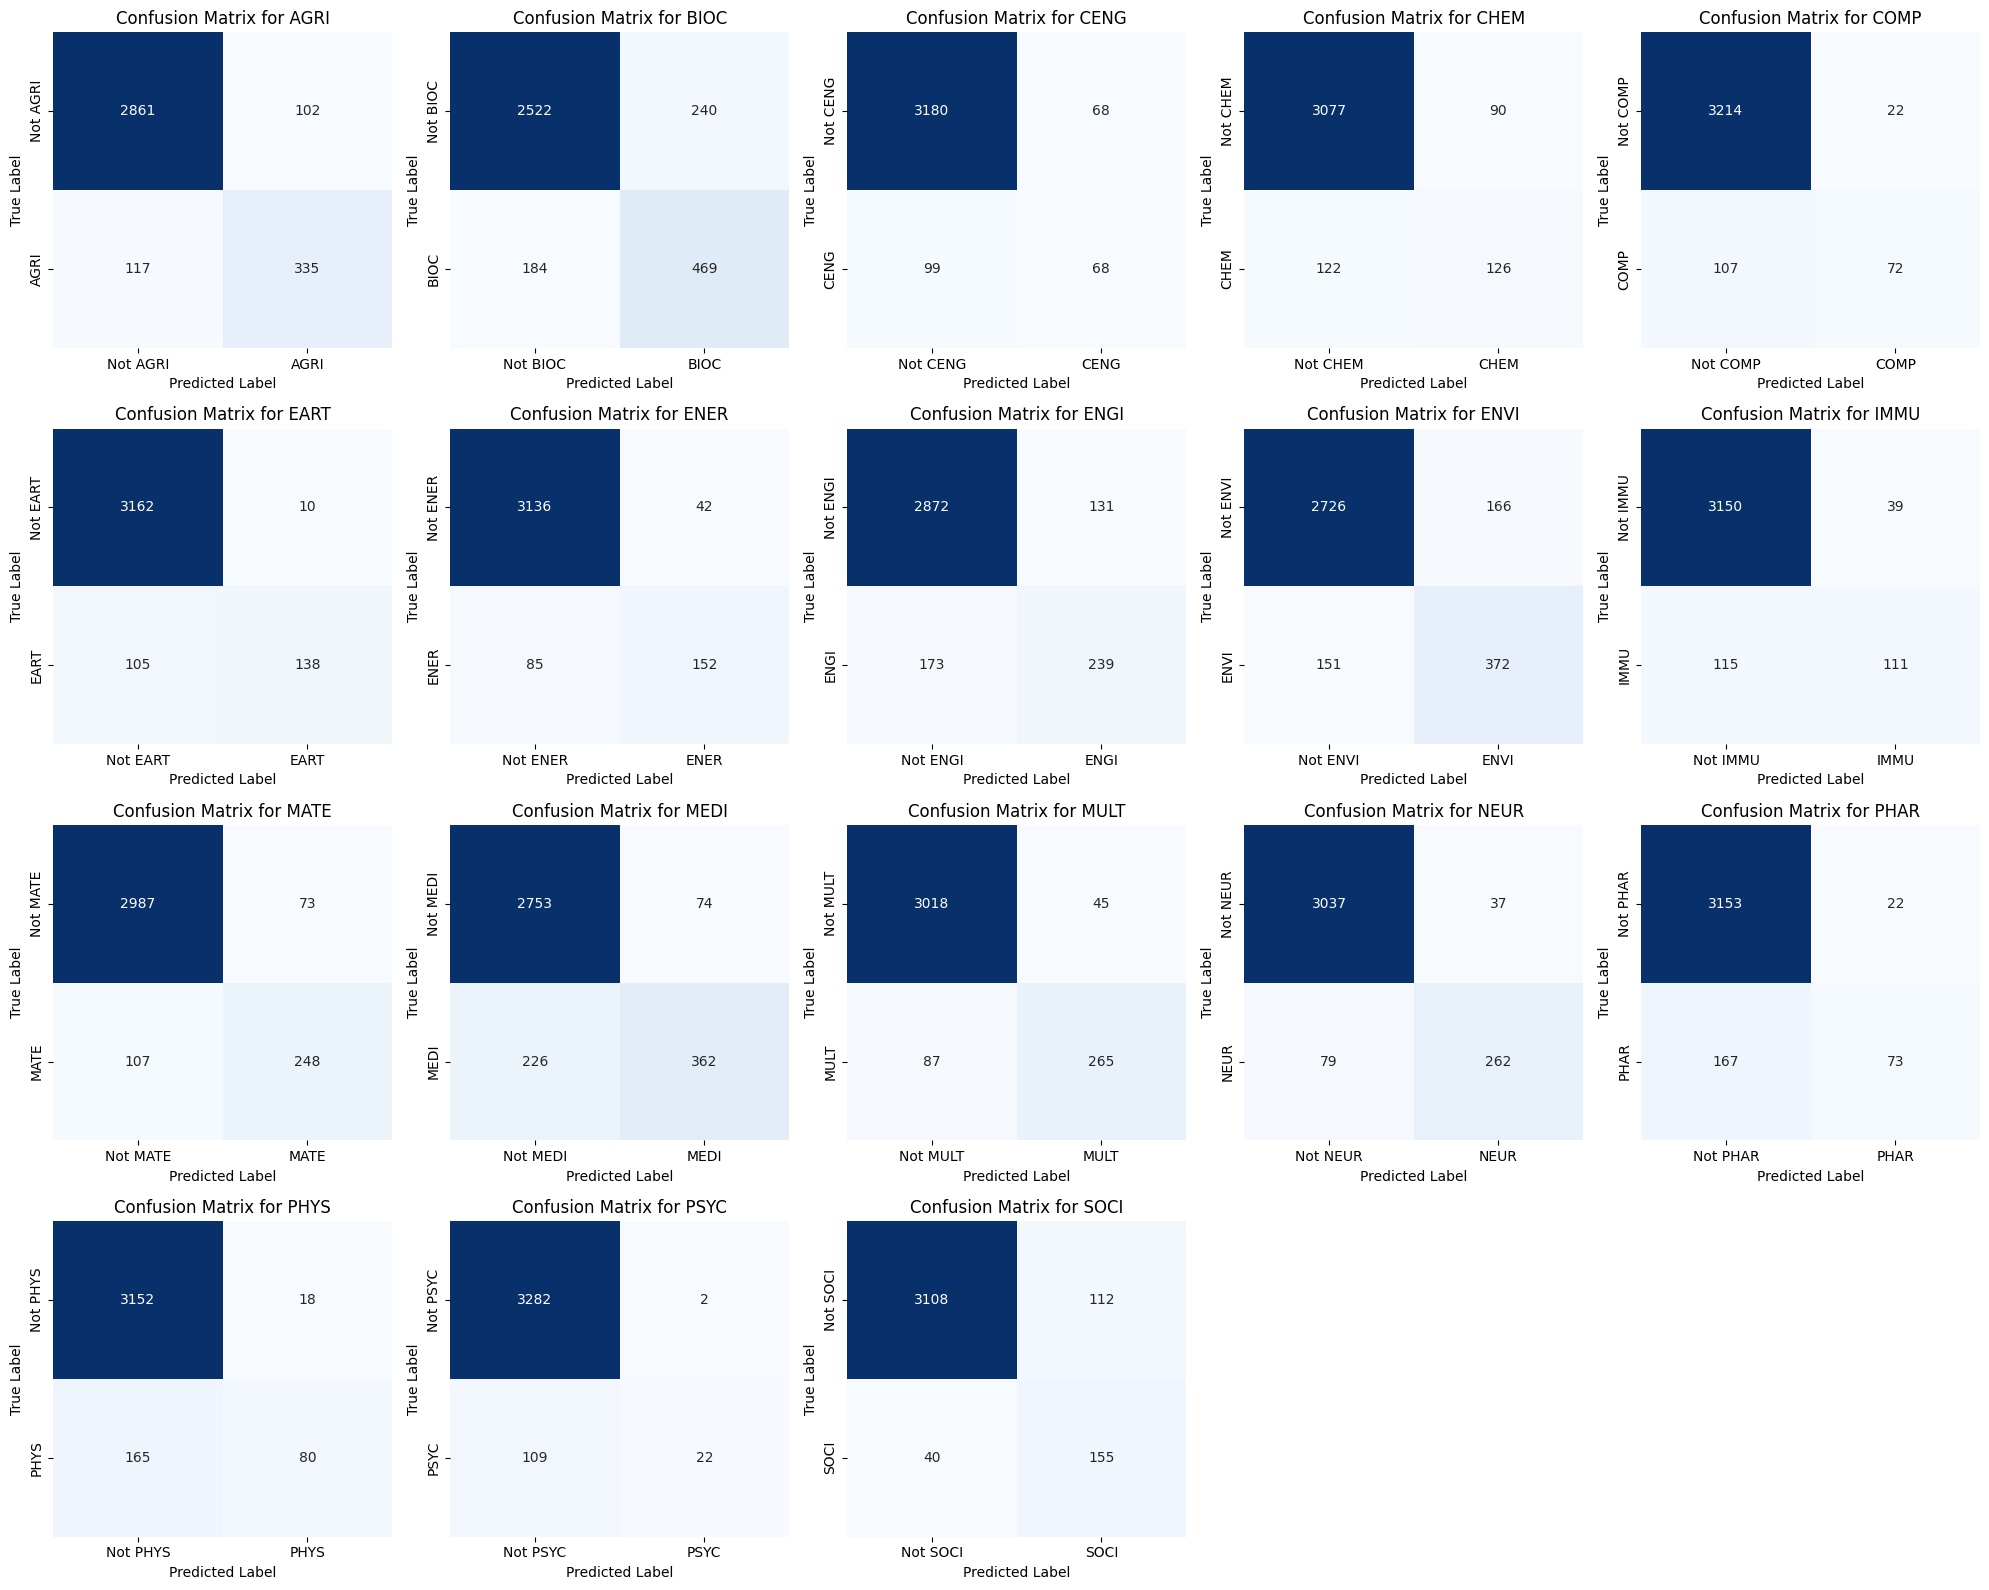

In [ ]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix

def show_results(model, features, true_labels, classes, threshold=0.5):
    prob_predictions = model.predict(features)

    yhat_val = (prob_predictions >= threshold).astype(int)

    print(classification_report(true_labels, yhat_val, target_names=classes, zero_division=1))  # Set zero_division=1

    confusion_matrices = multilabel_confusion_matrix(true_labels, yhat_val)

    n_classes = len(classes)
    n_cols = 5
    n_rows = int(np.ceil(n_classes / n_cols))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))

    axes = axes.flatten()

    for i, matrix in enumerate(confusion_matrices):
        sns.heatmap(matrix,
                    annot=True,
                    fmt='d',
                    cmap='Blues',
                    cbar=False,
                    ax=axes[i])
        axes[i].set_title(f'Confusion Matrix for {classes[i]}')
        axes[i].set_xlabel('Predicted Label')
        axes[i].set_ylabel('True Label')
        axes[i].set_xticklabels(['Not '+classes[i], classes[i]])
        axes[i].set_yticklabels(['Not '+classes[i], classes[i]], va='center')

    for ax in axes[n_classes:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()


show_results(pooler_bert_model,
             [valid_encodings.input_ids, valid_encodings.token_type_ids, valid_encodings.attention_mask],
             val_labels,
             target_names)


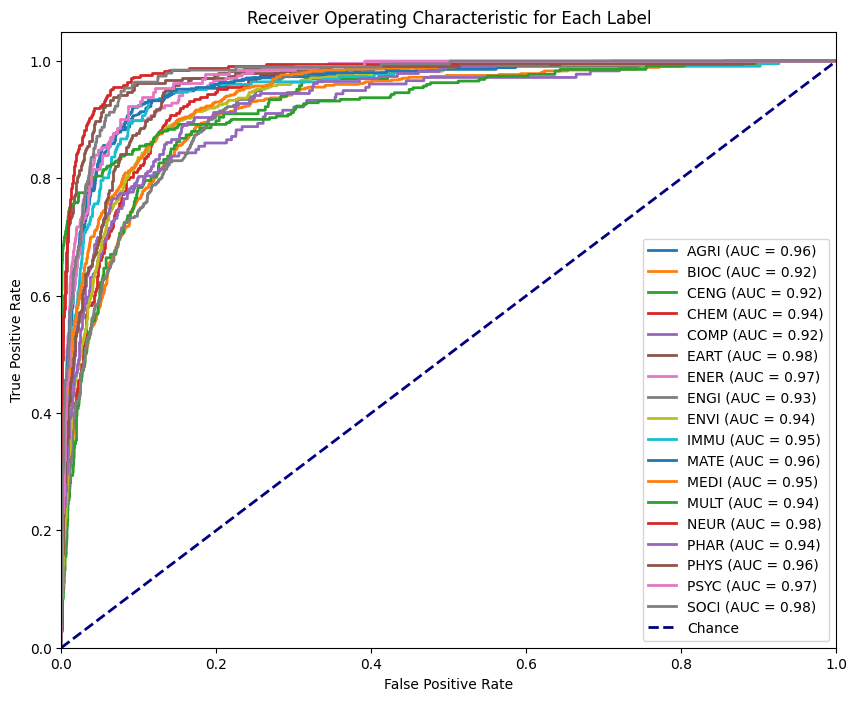

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_multilabel_roc(true_labels, predictions, target_names):
    """
    Function to plot the ROC curves for each label in multi-label classification.

    Parameters:
    - true_labels: Array-like of shape (n_samples, n_labels), ground truth label indicators.
    - predictions: Array-like of shape (n_samples, n_labels), prediction probabilities or decision function.
    - target_names: List of strings of shape (n_labels,), names of each of the labels.

    """
    n_labels = true_labels.shape[1]

    fig, ax = plt.subplots(figsize=(10, 8))

    for i in range(n_labels):
        fpr, tpr, _ = roc_curve(true_labels[:, i], predictions[:, i])
        roc_auc = auc(fpr, tpr)
        ax.plot(fpr, tpr, lw=2, label=f'{target_names[i]} (AUC = {roc_auc:.2f})')

    # Plot chance line
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance')

    # Customize the plot
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver Operating Characteristic for Each Label')
    ax.legend(loc="lower right")

    # Show the plot
    plt.show()

plot_multilabel_roc(val_labels, val_predictions, target_names)


In [ ]:
test_score = pooler_bert_model.evaluate([test_encodings.input_ids, test_encodings.token_type_ids, test_encodings.attention_mask],
                                                  test_labels)

print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

109/109 [==============================] - 73s 670ms/step - loss: 0.1496 - accuracy: 0.5612
Test loss: 0.1496182233095169
Test accuracy: 0.5612009167671204


In [ ]:
test_predictions = pooler_bert_model.predict([test_encodings.input_ids, test_encodings.token_type_ids, test_encodings.attention_mask])

109/109 [==============================] - 73s 667ms/step


109/109 [==============================] - 73s 668ms/step
              precision    recall  f1-score   support

        AGRI       0.73      0.74      0.73       410
        BIOC       0.66      0.77      0.71       630
        CENG       0.50      0.32      0.39       191
        CHEM       0.56      0.50      0.53       258
        COMP       0.75      0.34      0.47       148
        EART       0.87      0.59      0.70       219
        ENER       0.73      0.66      0.69       268
        ENGI       0.66      0.54      0.59       425
        ENVI       0.69      0.64      0.67       546
        IMMU       0.74      0.49      0.59       228
        MATE       0.80      0.71      0.75       337
        MEDI       0.84      0.61      0.71       627
        MULT       0.85      0.75      0.79       393
        NEUR       0.86      0.73      0.79       383
        PHAR       0.75      0.36      0.49       244
        PHYS       0.85      0.24      0.38       227
        PSYC       0.79

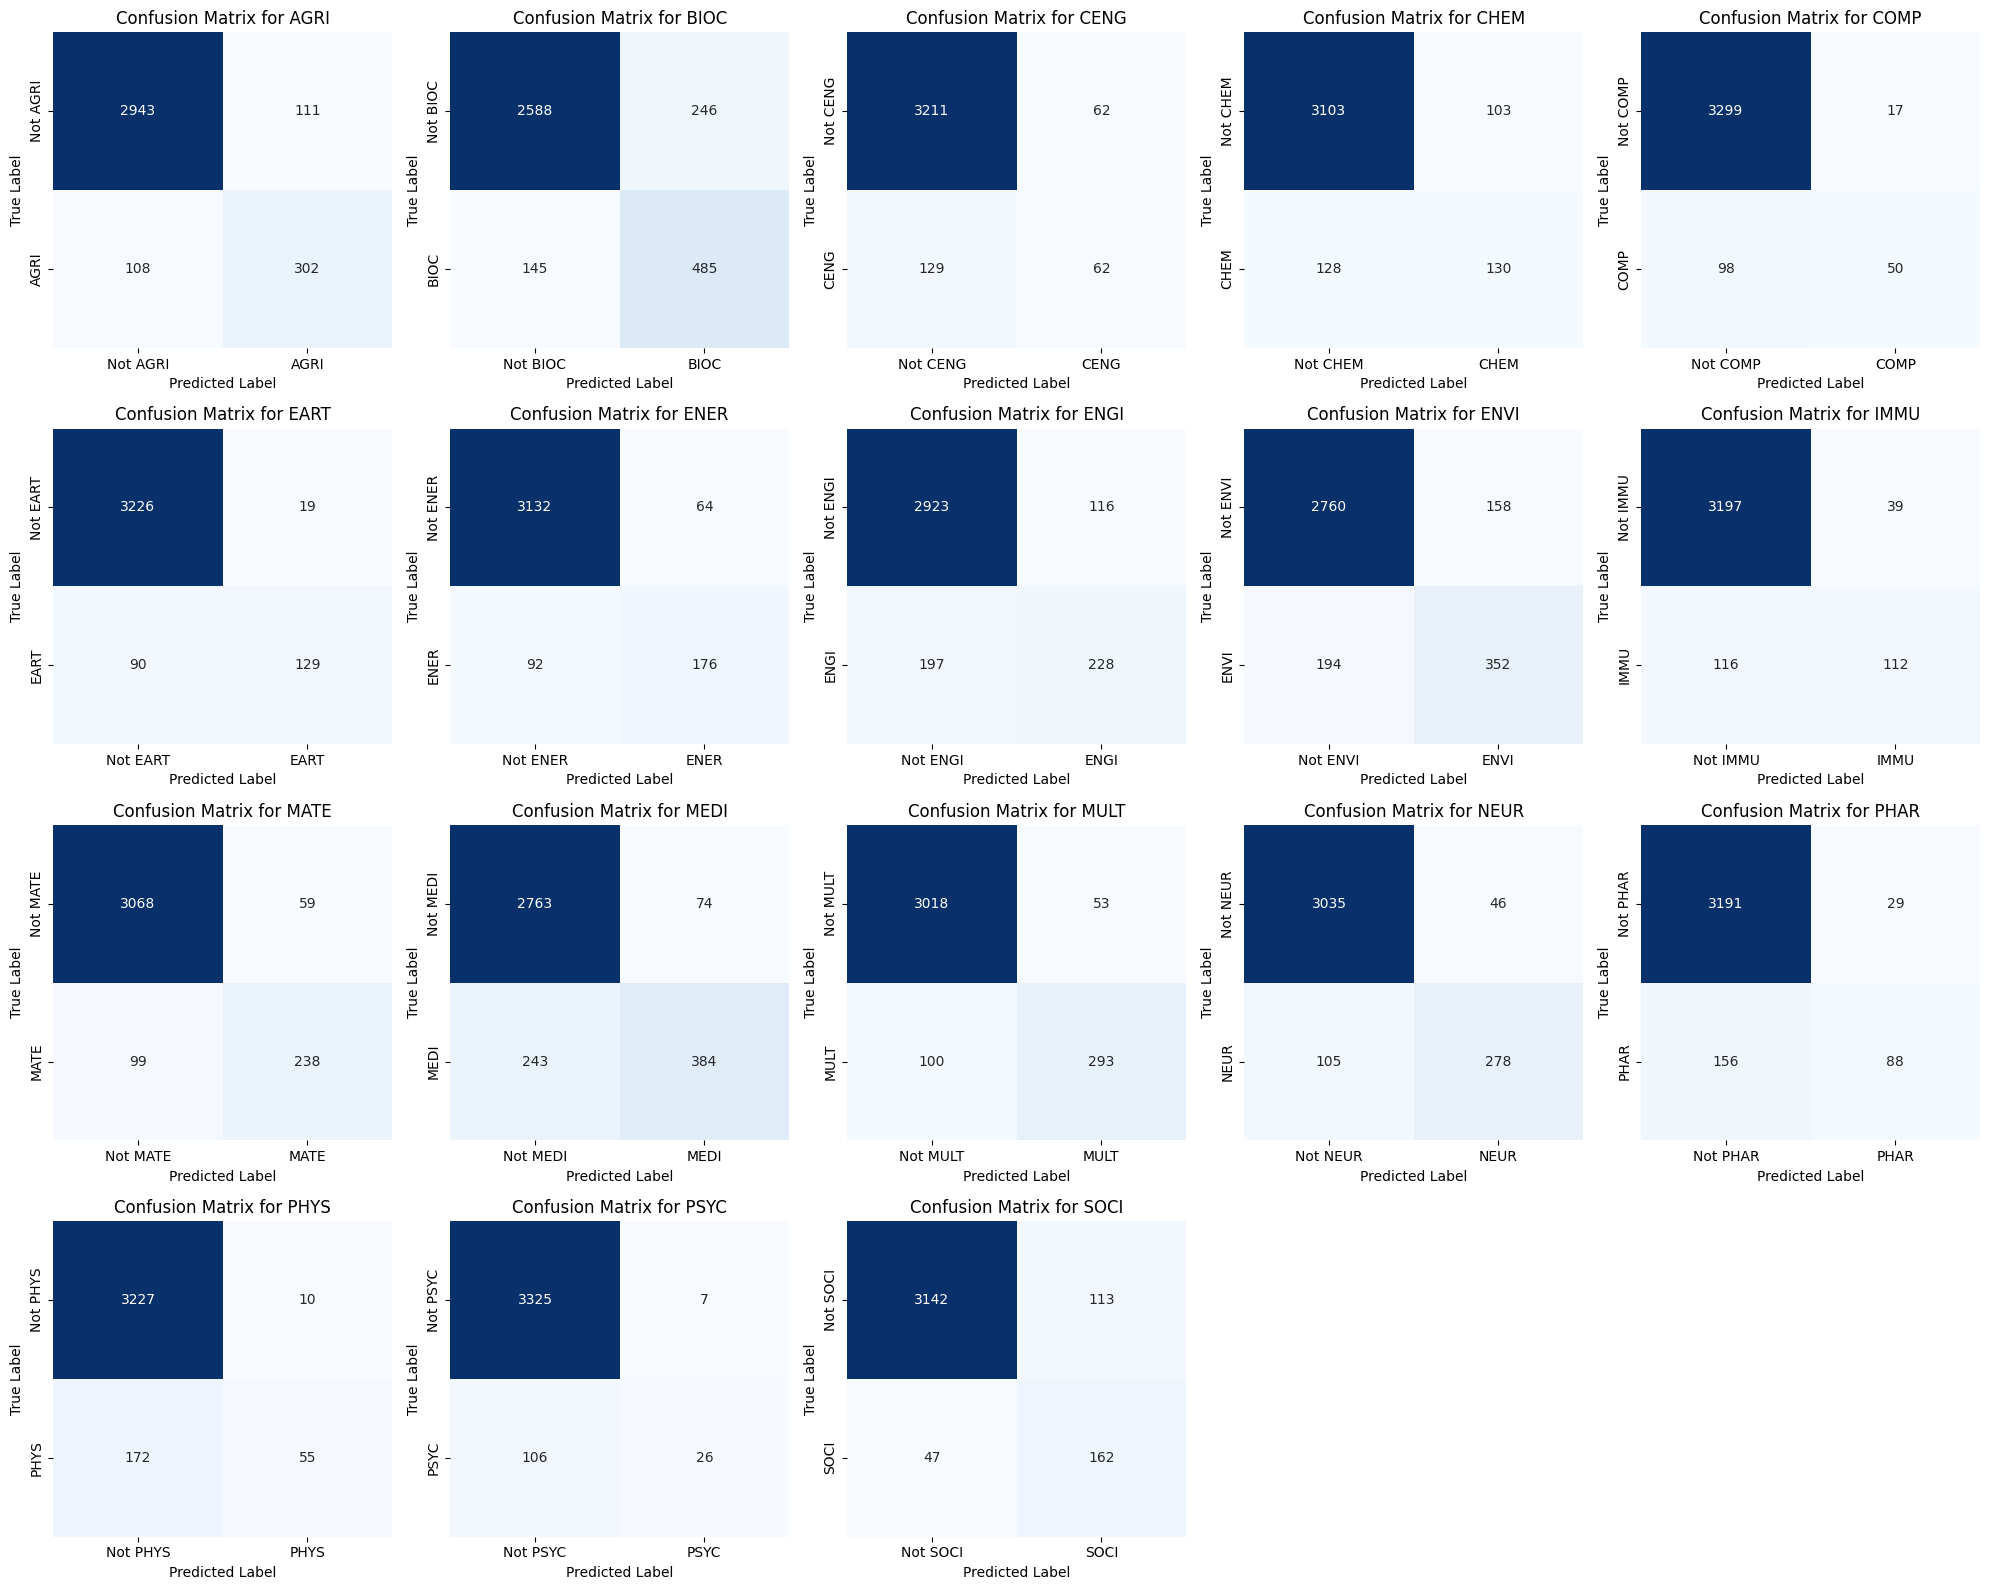

In [ ]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix

def show_results(model, features, true_labels, classes, threshold=0.5):
    prob_predictions = model.predict(features)

    yhat_val = (prob_predictions >= threshold).astype(int)

    print(classification_report(true_labels, yhat_val, target_names=classes, zero_division=1))
    confusion_matrices = multilabel_confusion_matrix(true_labels, yhat_val)

    n_classes = len(classes)
    n_cols = 5
    n_rows = int(np.ceil(n_classes / n_cols))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))

    axes = axes.flatten()

    for i, matrix in enumerate(confusion_matrices):
        sns.heatmap(matrix,
                    annot=True,
                    fmt='d',
                    cmap='Blues',
                    cbar=False,
                    ax=axes[i])
        axes[i].set_title(f'Confusion Matrix for {classes[i]}')
        axes[i].set_xlabel('Predicted Label')
        axes[i].set_ylabel('True Label')
        axes[i].set_xticklabels(['Not '+classes[i], classes[i]])
        axes[i].set_yticklabels(['Not '+classes[i], classes[i]], va='center')

    for ax in axes[n_classes:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()


show_results(pooler_bert_model,
             [test_encodings.input_ids, test_encodings.token_type_ids, test_encodings.attention_mask],
             test_labels,
             target_names)


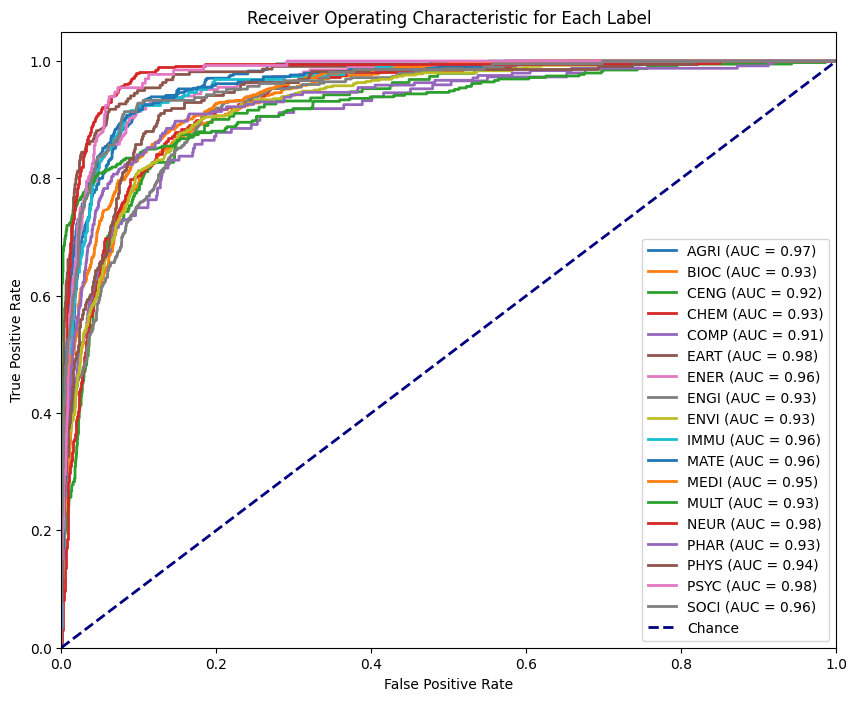

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_multilabel_roc(true_labels, predictions, target_names):
    """
    Function to plot the ROC curves for each label in multi-label classification.

    Parameters:
    - true_labels: Array-like of shape (n_samples, n_labels), ground truth label indicators.
    - predictions: Array-like of shape (n_samples, n_labels), prediction probabilities or decision function.
    - target_names: List of strings of shape (n_labels,), names of each of the labels.

    """
    n_labels = true_labels.shape[1]

    fig, ax = plt.subplots(figsize=(10, 8))

    for i in range(n_labels):
        fpr, tpr, _ = roc_curve(true_labels[:, i], predictions[:, i])
        roc_auc = auc(fpr, tpr)
        ax.plot(fpr, tpr, lw=2, label=f'{target_names[i]} (AUC = {roc_auc:.2f})')

    # Plot chance line
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance')

    # Customize the plot
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver Operating Characteristic for Each Label')
    ax.legend(loc="lower right")

    # Show the plot
    plt.show()

plot_multilabel_roc(test_labels, test_predictions, target_names)


In [ ]:
!pip install google-auth

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

def save_predictions_to_csv(test_predictions, test_texts, test_df, target_names, result_path, threshold=0.5):
    """
    Process model predictions and save a CSV file with abstracts, true labels, predicted labels,
    the most probable predicted label, and its probability.

    Args:
        test_predictions (np.array): The predictions from the model, assumed to be probabilities.
        test_texts (list or np.array): The texts that were input to the model for prediction.
        test_df (pd.DataFrame): The original DataFrame containing the true labels.
        target_names (list): List of target class names corresponding to indices in model outputs.
        result_path (str, optional): Path to save the resulting CSV file. Defaults to './'.
        threshold (float, optional): Probability threshold to consider a prediction as positive. Defaults to 0.5.
    """
    predicted_labels = []
    max_probs = []
    max_labels = []

    for probs in test_predictions:
        # Identify labels exceeding the threshold
        labels = [target_names[idx] for idx, p in enumerate(probs) if p >= threshold]
        predicted_labels.append(labels)

        # Identify the max probability and corresponding label
        max_idx = np.argmax(probs)
        max_prob = probs[max_idx]
        max_label = target_names[max_idx]

        max_probs.append(max_prob)
        if labels:
            max_labels.append(max_label)
        else:
            max_probs[-1] = 0  # Reset max_prob if no labels meet the threshold
            max_labels.append("No Label")

    result_df = pd.DataFrame({
        'abstract': test_texts,
        'true_label': test_df['subjareas'],
        'pred_label': predicted_labels,
        'max_pred_label': max_labels,
        'max_prediction_probability': max_probs
    })

    result_df['pred_label'] = result_df['pred_label'].apply(lambda x: ', '.join(x) if x else 'No Label')

    # Saving the results
    result_df.to_csv(result_path + 'bert_lam.csv', index=False)

    return result_df

result_path = '/content/drive/MyDrive/'
save_predictions_to_csv(test_predictions, test_texts, test_df, target_names, result_path)


Mounted at /content/drive


,abstract,true_label,pred_label,max_pred_label,max_prediction_probability
0,Objective: The English 'stop smoking services'...,[MEDI],"MEDI, PHAR",MEDI,0.970157
1,Interfacial layers are commonly employed in or...,"[CHEM, ENGI, MATE, PHYS]",MATE,MATE,0.854909
3,Large-scale mismanagement of natural resources...,[ENVI],"ENVI, SOCI",SOCI,0.936692
4,This analysis elaborates further the concept o...,"[ENGI, ENVI]","ENGI, ENVI, SOCI",ENGI,0.791444
6,Given the huge advances in tomographic imaging...,[COMP],COMP,COMP,0.583722
...,...,...,...,...,...
4002,"Many pathogens persist in multihost systems, m...",[AGRI],"IMMU, MEDI",IMMU,0.847660
4004,Policy makers and environmental agencies have ...,"[ENER, ENVI]","ENER, SOCI",ENER,0.956680
4005,The Lafayette meteorite is an olivine clinopyr...,[EART],EART,EART,0.990749
4006,Four atmospheric pressure ozone oxidation meth...,"[CHEM, ENGI, MATE, PHYS]","CENG, CHEM",CHEM,0.737223
